In [1]:
!pip install pandas_profiling

  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=eff4c63f90b9ba279944b00e08ed9d64328a0c0a1a880bb3da1777d892be53ff
  Stored in directory: c:\users\andri\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=8acdecf5c5e977d9912ed521bef42cb91e8d24248a7b5608ea91f7d0240ef54d
  Stored in directory: c:\users\andri\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

In [3]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [4]:
data.drop('sl_no', axis=1, inplace=True)

In [5]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
data.shape

(215, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [8]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
report = data.profile_report(title='Campus', progress_bar=False)
report

In [11]:
data['salary'].fillna(value=0, inplace=True)
print('salary empty', data['salary'].isnull().sum(), sep = '\n')

salary empty
0


In [12]:
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

C:\Users\Andri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


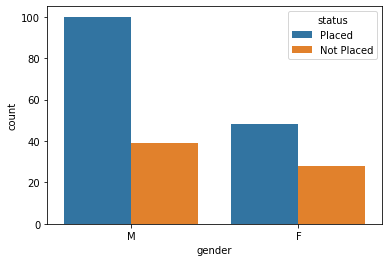

In [13]:
sns.countplot('gender', hue='status', data=data)
plt.show()

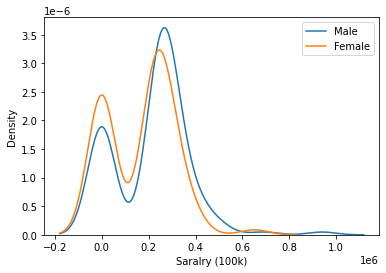

In [14]:
sns.kdeplot(data.salary[data.gender=='M'])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Saralry (100k)")
plt.show()

C:\Users\Andri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


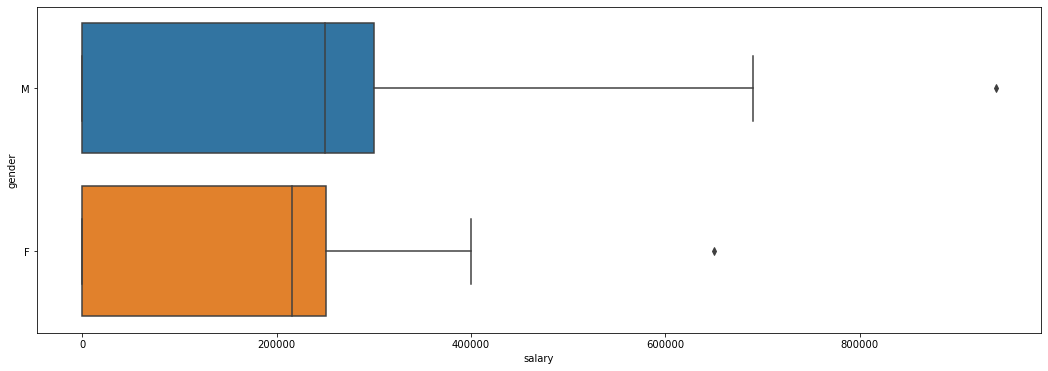

In [15]:
plt.figure(figsize=(18,6))
sns.boxplot('salary','gender', data=data)
plt.show()

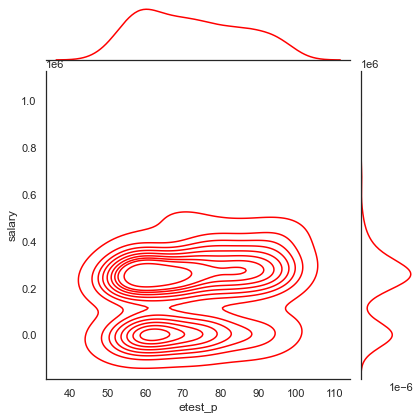

In [20]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='white', color_codes=True)
sns.jointplot(x=data['etest_p'], y=data['salary'], kind='kde', color = 'red')
plt.show()

C:\Users\Andri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


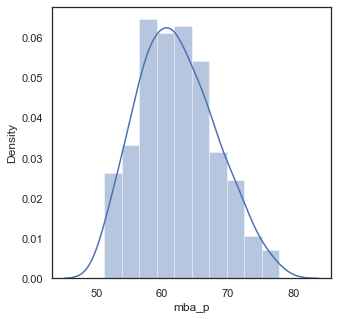

In [21]:
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(5,5)

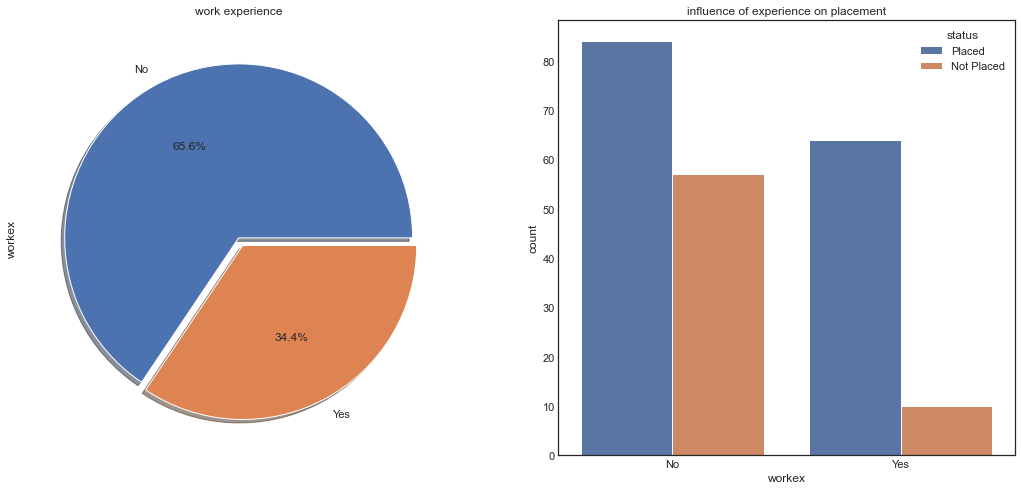

In [23]:
plt.style.use('seaborn-white')
f,ax = plt.subplots(1,2, figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct= '%1.1f%%', ax=ax[0],
shadow=True)
ax[0].set_title('work experience')
sns.countplot(x='workex', hue='status', data=data)
ax[1].set_title('influence of experience on placement')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
object_cols = ('gender', 'workex', 'specialisation','status')
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [33]:
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y= data ['status']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [37]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print('Accuracy score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score 0.8
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.83      0.89      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.79      0.80      0.80        65



In [38]:
pickle.dump(dtree, open('model.pkl','wb'))

In [39]:
haha = None

In [40]:
from joblib import load
haha = load('model.pkl')

In [41]:
type(haha)

sklearn.tree._classes.DecisionTreeClassifier

In [ ]:
y_pred = haha.predict(X_test)

print('accuracy score', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y))